In [5]:
# Add Matplotlib inline magic command.
%matplotlib inline

#Import dependencies.
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Load the files.
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [7]:
#Read the files.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [21]:
# Inspect the city data DataFrame

In [8]:
# Get the columns and rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [12]:
# Get the columns and rows that are null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [13]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [14]:
# Get the unique values of the type of city.
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [17]:
# Get the number of data points from the Urban cities.
(city_data_df['type'] =='Urban').sum()

66

In [18]:
# Get the number of data points from the Suburban cities.
(city_data_df['type'] =='Suburban').sum()

36

In [19]:
# Get the number of data points from the Rural cities.
(city_data_df['type'] =='Rural').sum()

18

In [20]:
# Inspect the ride data DataFrame.

In [23]:
# Get the columns and rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [27]:
# Get the columns and rows that are null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [28]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [29]:
# Combine the data into a single DataFrame.
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=['city', 'city'])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [42]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']

In [43]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']

In [46]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

In [49]:
# Calculate the total number of rides by city for each city type.
urban_ride_count = urban_cities_df.groupby('city').count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby('city').count()['ride_id']
rural_ride_count = rural_cities_df.groupby('city').count()['ride_id']

In [50]:
# Calculate the average fare by city for each city type.
urban_avg_fare = urban_cities_df.groupby('city').mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby('city').mean()['fare']
rural_avg_fare = rural_cities_df.groupby('city').mean()['fare']

In [51]:
# Get the average driver count by city for each city type.
urban_driver_count = urban_cities_df.groupby('city').mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby('city').mean()['driver_count']
rural_driver_count = rural_cities_df.groupby('city').mean()['driver_count']

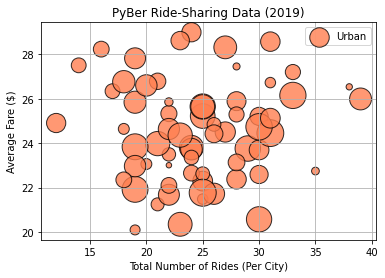

In [66]:
# Create the urban cities scatter plot.  
plt.scatter(urban_ride_count, urban_avg_fare, s=urban_driver_count*10, edgecolors='black', linewidths=1, color='coral', alpha=0.8, label='Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

# Add the legend.
plt.legend()

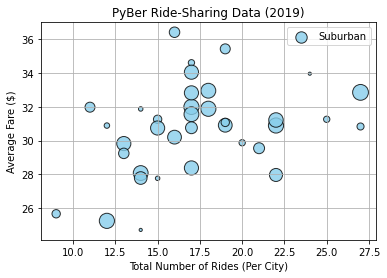

In [67]:
# Create the suburban cities scatter plot.  
plt.scatter(suburban_ride_count, suburban_avg_fare, s=suburban_driver_count*10, edgecolors='black', linewidths=1, color='skyblue', alpha=0.8, label='Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

# Add the legend.
plt.legend()

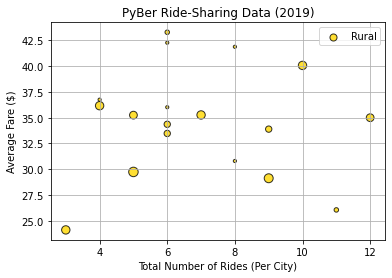

In [68]:
# Create the rural cities scatter plot.  
plt.scatter(rural_ride_count, rural_avg_fare, s=rural_driver_count*10, edgecolors='black', linewidths=1, color='gold', alpha=0.8, label='Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

# Add the legend.
plt.legend()

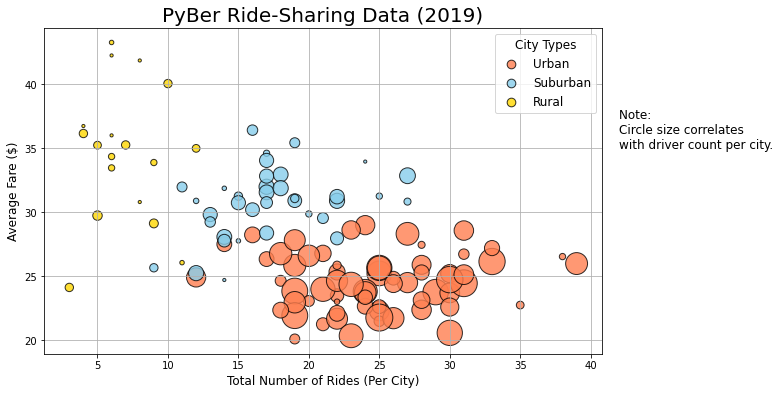

In [82]:
# Create the urban cities scatter plot.  
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, s=urban_driver_count*10, edgecolors='black', linewidths=1, color='coral', alpha=0.8, label='Urban')

# Create the suburban cities scatter plot.  
plt.scatter(suburban_ride_count, suburban_avg_fare, s=suburban_driver_count*10, edgecolors='black', linewidths=1, color='skyblue', alpha=0.8, label='Suburban')

# Create the rural cities scatter plot.  
plt.scatter(rural_ride_count, rural_avg_fare, s=rural_driver_count*10, edgecolors='black', linewidths=1, color='gold', alpha=0.8, label='Rural')

# Add labels and formatting to the chart
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.grid(True)

# Create a legend.
lgnd = plt.legend(fontsize='12', mode='Expanded', scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: \nCircle size correlates \nwith driver count per city.", fontsize='12')

# Save the figure.
plt.savefig("Analysis/Fig1.png", bbox_inches="tight")

# Show the plot.
plt.show()